# Capstone Project
## Problem Statement:
Predicting Cricket Player Performance Based on Historical Match Data
## Business Context:
Cricket teams and sports analysts need reliable data-driven insights to make informed decisions on player selection, training focus, and match strategies. By analyzing past performance statistics, we can build models to predict a player's future contributions — such as the number of runs, wickets, or overall match impact.

This project utilizes historical player data containing batting and bowling statistics across multiple years. The objective is to analyze and model player performance to assist selectors, coaches, and fantasy league players in decision-making.

## Project Objective:

#1. Exploratory Data Analysis (EDA):

Understand the structure and content of the player performance dataset.

Clean and convert data types (many columns are currently object).

Visualize trends over years, such as:

Average runs scored

Strike rate trends

top 10 Wickets taken

Compare batting vs bowling contributions

#2. Classification Task (Binary Classification):

Problem: Predict whether a player will score a half-century or more in a given season.

Create a binary target column: Will_Score_50+ = 1 if Half_Centuries > 0 else 0

Goal: Build and evaluate classification models using:

Logistic Regression

Decision Tree Classifier

Random Forest Classifier

Features: Use batting and bowling stats such as Balls_Faced, Matches_Batted, Runs_Scored, etc.

Evaluation Metrics:

Accuracy, Precision, Recall, F1-Score, ROC-AUC

#3. Regression Task (Predictive Modeling):

#Problem: Predict the total Runs_Scored by a player in a season.

Goal: Build regression models:

Linear Regression

Decision Tree Regressor

Random Forest Regressor

Features: Use Matches_Batted, Balls_Faced, Strike Rate, Not Outs, etc.

Evaluation Metrics:

RMSE, MAE, R² Score

#4. Model Evaluation:

Use classification and regression metrics to evaluate model performance.

Perform cross-validation for robustness.

Use feature importance and model interpretability tools (like SHAP) where relevant.

#5. Model Deployment (Optional if time permits):

Build a Streamlit/Flask dashboard where:

A user can input a player's stats

Get predictions on expected performance or match outcome impact

Visual summary of player profiles and predicted stats



# *Importing the necessary libraries*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Observations:
1. The required libraries for data analysis and visualization (NumPy, pandas, seaborn, matplotlib) are successfully imported.
2. These libraries will be used throughout the notebook for data manipulation and plotting.

In [2]:
from matplotlib import pyplot as plt

# Observations:
1. The pyplot module from matplotlib is imported, which is essential for creating various types of plots.
2. This import allows for more concise plotting commands using 'plt' as an alias.

# Loading the dataset

In [3]:
df=pd.read_csv('cricket_data.csv')
df.head().T

,0,1,2,3,4
Year,2024,2023,2022,2021,2020
Player_Name,Ruturaj Gaikwad,Ruturaj Gaikwad,Ruturaj Gaikwad,Ruturaj Gaikwad,Ruturaj Gaikwad
Matches_Batted,2,16,14,16,6
Not_Outs,0,1,0,2,2
Runs_Scored,61,590,368,635,204
Highest_Score,46,92,99,101*,72
Batting_Average,30.5,42.14,26.29,45.35,51
Balls_Faced,51,400,291,466,169
Batting_Strike_Rate,119.61,147.5,126.46,136.26,120.71
Centuries,0,0,0,1,0


# Observations:
1. The dataset 'cricket_data.csv' is loaded into a DataFrame named df, and the first few rows are displayed for initial inspection.
2. Transposing the output (using .T) helps to view all columns for a single row, which is useful for wide datasets.

# 1- Basic Exploration of data
 * 1.1 Checking the top 5 rows
 * 1.2 Checking the shape of dataset
 * 1.3 Checking the info of dataset
 * 1.4 Checking the Statistical summary

#  1.1 Checking the top 5 rows

In [4]:
df.head(5)

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
0,2024,Ruturaj Gaikwad,2,0,61,46,30.5,51,119.61,0,...,2,0,0,0,0,0,0,0,0,0
1,2023,Ruturaj Gaikwad,16,1,590,92,42.14,400,147.5,0,...,16,0,0,0,0,0,0,0,0,0
2,2022,Ruturaj Gaikwad,14,0,368,99,26.29,291,126.46,0,...,14,0,0,0,0,0,0,0,0,0
3,2021,Ruturaj Gaikwad,16,2,635,101*,45.35,466,136.26,1,...,16,0,0,0,0,0,0,0,0,0
4,2020,Ruturaj Gaikwad,6,2,204,72,51,169,120.71,0,...,6,0,0,0,0,0,0,0,0,0


# Observations:
1. The first five rows provide a snapshot of the dataset, helping to identify column names and data types.
2. This preview can reveal potential data quality issues, such as missing values or inconsistent formatting.

# Observations:
 1.Highest individual scores (filter/remove asterisk "*" in Highest_Score).
 
 2.Handle missing or zero data appropriately

#  1.2 Checking the shape (no.of rows and columns in dataset)

In [5]:
df.shape

(1172, 25)

# Observations:
1. The shape output shows the number of rows and columns, giving a sense of the dataset's size.
2. This information is useful for planning memory usage and understanding the scale of analysis required.

# Observations
# There are 25 rows and 1172 columns in dataset

#  1.3 Checking the info of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 1172 non-null   object
 1   Player_Name          1172 non-null   object
 2   Matches_Batted       1172 non-null   object
 3   Not_Outs             1172 non-null   object
 4   Runs_Scored          1172 non-null   object
 5   Highest_Score        1172 non-null   object
 6   Batting_Average      1172 non-null   object
 7   Balls_Faced          1172 non-null   object
 8   Batting_Strike_Rate  1172 non-null   object
 9   Centuries            1172 non-null   object
 10  Half_Centuries       1172 non-null   object
 11  Fours                1172 non-null   object
 12  Sixes                1172 non-null   object
 13  Catches_Taken        1172 non-null   object
 14  Stumpings            1172 non-null   object
 15  Matches_Bowled       1172 non-null   object
 16  Balls_

# Observations:
1. The info output reveals the data types of each column and the number of non-null entries, highlighting columns with missing values.
2. This helps identify which columns may need type conversion or imputation during preprocessing.

# Observations
 1. The dataset is having 25 columns and 1172 rows.
 2. There are missing entries.


#  1.4 Statistical summary

In [7]:
df.describe(include='all')

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
count,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,...,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172
unique,18,247,21,12,389,222,576,329,712,6,...,21,222,363,31,215,494,382,375,5,3
top,2023,MS Dhoni,14,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
freq,162,17,170,421,179,148,171,131,127,1094,...,170,419,419,524,419,524,420,524,1052,1110


# Observations:
1. The describe() output provides key statistics (mean, std, min, max, etc.) for each column, helping to understand data distribution.
2. It can reveal outliers, skewness, or unexpected values that may need further investigation.

# Observations
 1. Removing rows where the Year column contained invalid entries like "No stats".
 2. Converting the Year column to integers for proper sorting and filtering

# 2-Exploratory Data Analysis (EDA)
2.1 Checking the duplicate rows and fetching them.

2.2 Checking Null Values (columnwise, percentage wise in columns and row-wise.

2.3 Outliers Analysis.

2.4 Univariate Analysis.

2.5 Bivariate Analysis.

# 2.1 Checking the duplicate rows

In [8]:
# total number of duplicate rows
df.duplicated().sum()

np.int64(0)

# Observations:
1. The output shows the total number of duplicate rows in the dataset, which is important for data integrity.
2. Identifying duplicates helps prevent bias and redundancy in analysis and modeling.

In [9]:
# Fetching duplicate rows
df[df.duplicated()]

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls


# Observations:
1. This output displays any rows that are exact duplicates, allowing for manual inspection if needed.
2. If the result is empty, it confirms that there are no duplicate rows present in the dataset.

# Observations
 1.There are no duplicates rows.

# 2.2 Checking Null Values

In [10]:
# Column-wise null values
df.isnull().sum()

Year                   0
Player_Name            0
Matches_Batted         0
Not_Outs               0
Runs_Scored            0
Highest_Score          0
Batting_Average        0
Balls_Faced            0
Batting_Strike_Rate    0
Centuries              0
Half_Centuries         0
Fours                  0
Sixes                  0
Catches_Taken          0
Stumpings              0
Matches_Bowled         0
Balls_Bowled           0
Runs_Conceded          0
Wickets_Taken          0
Best_Bowling_Match     0
Bowling_Average        0
Economy_Rate           0
Bowling_Strike_Rate    0
Four_Wicket_Hauls      0
Five_Wicket_Hauls      0
dtype: int64

# Observations:
1. The output lists the number of missing values in each column, helping to identify columns that may need imputation or removal.
2. Columns with a high number of nulls may not be useful for analysis or modeling.

In [11]:
# Percentage wise null values in columns
df.isnull().sum()/len(df)*100

Year                   0.0
Player_Name            0.0
Matches_Batted         0.0
Not_Outs               0.0
Runs_Scored            0.0
Highest_Score          0.0
Batting_Average        0.0
Balls_Faced            0.0
Batting_Strike_Rate    0.0
Centuries              0.0
Half_Centuries         0.0
Fours                  0.0
Sixes                  0.0
Catches_Taken          0.0
Stumpings              0.0
Matches_Bowled         0.0
Balls_Bowled           0.0
Runs_Conceded          0.0
Wickets_Taken          0.0
Best_Bowling_Match     0.0
Bowling_Average        0.0
Economy_Rate           0.0
Bowling_Strike_Rate    0.0
Four_Wicket_Hauls      0.0
Five_Wicket_Hauls      0.0
dtype: float64

# Observations:
1. This output shows the percentage of missing values in each column, which is useful for quickly identifying problematic columns.
2. Columns with a high percentage of nulls may be candidates for removal or require special handling.

In [12]:
# row-wise null values
df.isnull().sum(axis=1).sort_values(ascending=False)

1171    0
0       0
1       0
2       0
1155    0
       ..
8       0
7       0
6       0
5       0
4       0
Length: 1172, dtype: int64

# Observations:
1. The output lists the number of missing values for each row, sorted in descending order, which helps to spot rows with excessive nulls.
2. Rows with many missing values may need to be dropped to maintain data quality.

# Observations:
1. There is no Null values.

# 2.3 Outliers Analysis
2.3.1 Visualizing outliers.

2.3.2 Finding the no. of outliers in each column.

In [13]:
# Fetching the datasets having categorical & Numerical variables seperately
cat_variables= df.select_dtypes('object')
num_variables= df.select_dtypes(['int','float'])

# Observations:
1. The dataset is split into categorical and numerical variables, which is useful for targeted analysis and preprocessing.
2. This separation allows for applying appropriate techniques to each variable type, such as encoding for categorical and scaling for numerical.

# 2.3.1 Visualizing outliers

In [14]:
for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df, x=i)
    plt.show()

# Observations:
1. The boxplots for each numerical variable help to visually identify the presence and extent of outliers.
2. Variables with long whiskers or many points outside the box indicate potential outliers that may need treatment.

# 2.3.2 Finding the no. of outliers in each column

In [15]:
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print("Number of ouliers in ",i,":", len(df[df[i]>upper_limit]))
    print('-----------------------')

# Observations:
1. The output shows the count of outliers for each numerical column, helping to prioritize which variables need outlier treatment.
2. Columns with a high number of outliers may require special handling, such as capping or transformation.

# 2.4 Univariate Analysis

# 2.4.1. Categorical variables vizual analysis:

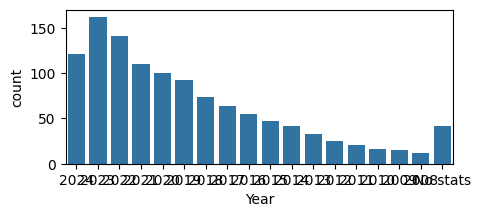

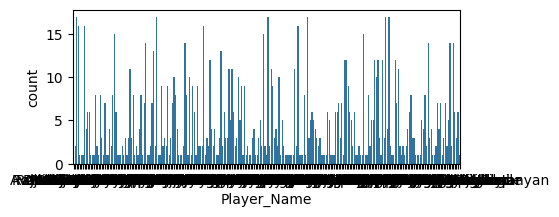

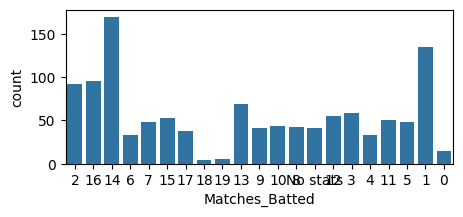

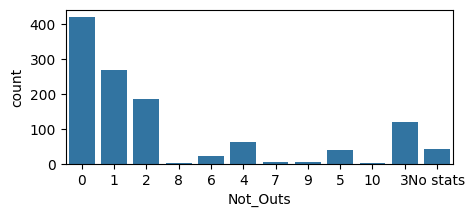

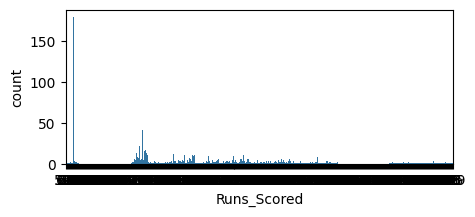

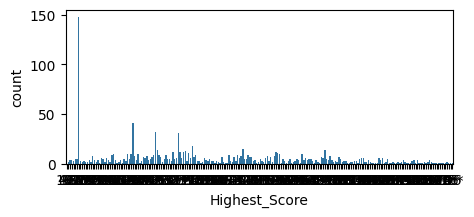

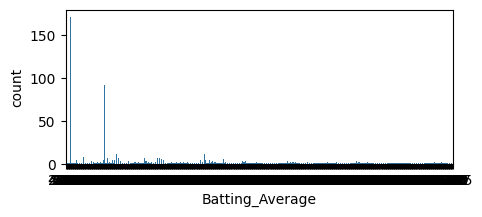

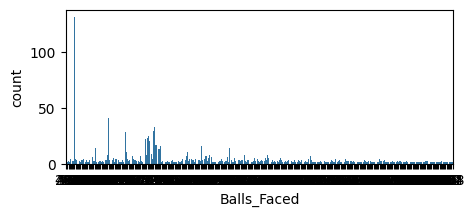

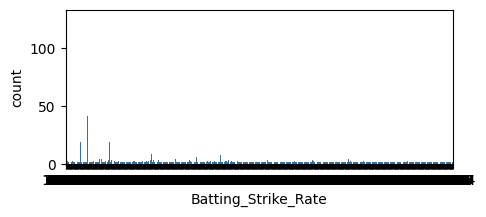

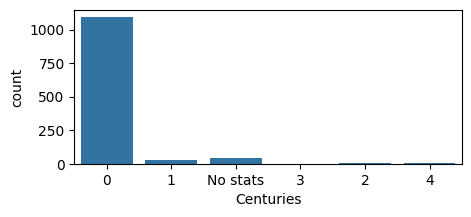

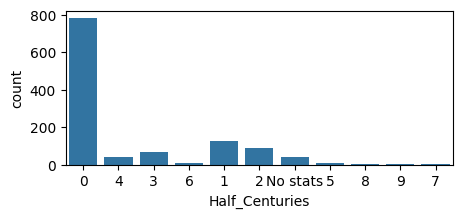

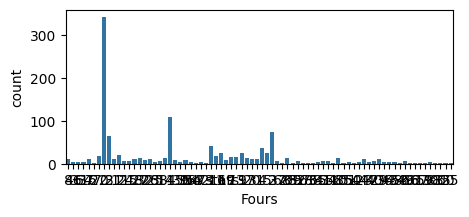

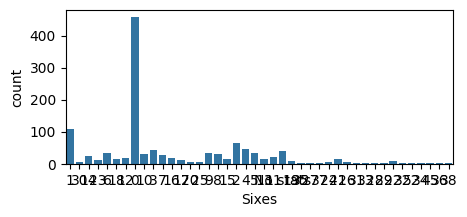

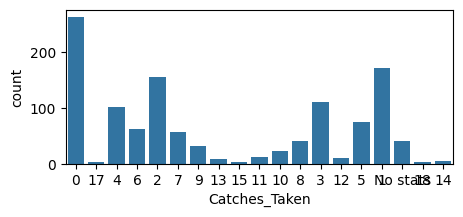

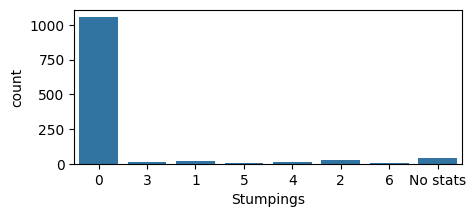

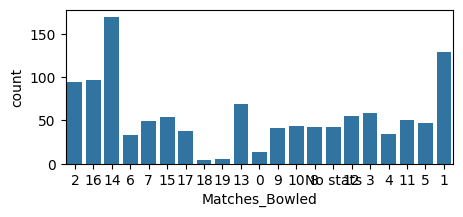

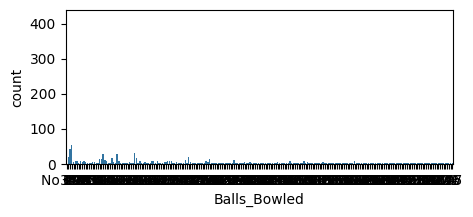

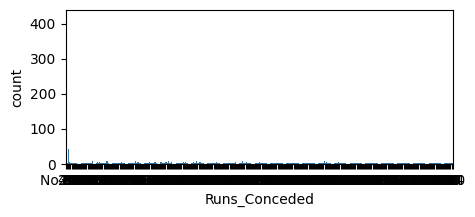

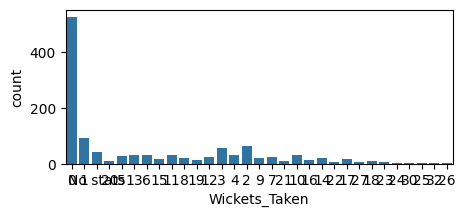

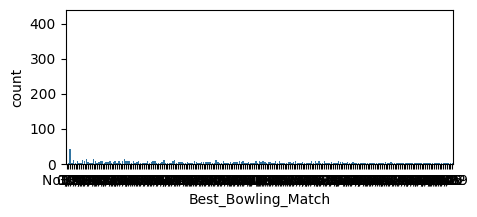

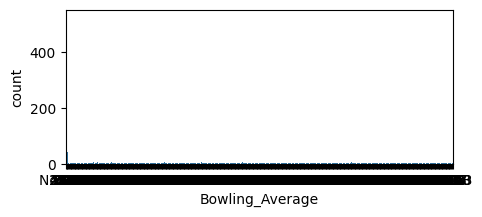

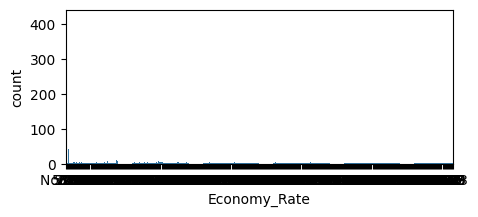

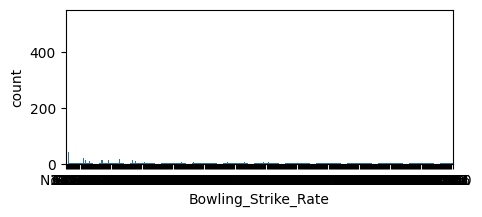

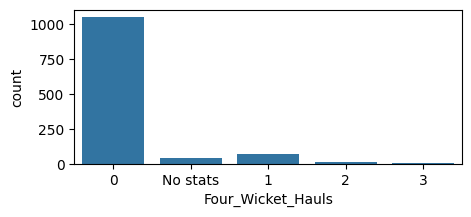

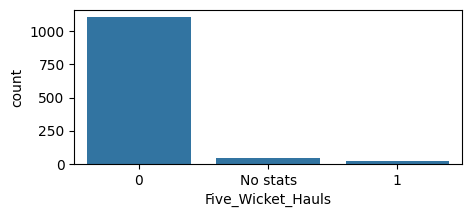

In [16]:
for i in cat_variables.columns:
    plt.figure(figsize=(5,2))
    sns.countplot(data=df, x=i)
    plt.show()

# Observations:
1. The countplots display the frequency of each category, making it easy to spot dominant or rare categories.
2. Imbalanced categories may require special attention during modeling, such as resampling or encoding.

# 2.4.2. Categorical variables numerical analysis:

In [17]:
for i in cat_variables.columns:
    print(df[i].value_counts())
    print('-------------')

Year
2023        162
2022        141
2024        121
2021        110
2020        100
2019         92
2018         74
2017         64
2016         55
2015         47
2014         42
No stats     42
2013         33
2012         25
2011         21
2010         16
2009         15
2008         12
Name: count, dtype: int64
-------------
Player_Name
MS Dhoni                  17
Wriddhiman Saha           17
Rohit Sharma              17
Dinesh Karthik            17
Virat Kohli               17
                          ..
Vyshak Vijay Kumar         1
Reece Topley               1
Himanshu Sharma            1
Sanvir Singh               1
Jhathavedh Subramanyan     1
Name: count, Length: 247, dtype: int64
-------------
Matches_Batted
14          170
1           135
16           96
2            92
13           69
3            59
12           55
15           53
11           51
5            48
7            48
10           44
8            42
9            41
No stats     41
17           38
6           

# Observations:
1. The value_counts output shows the distribution of each category, helping to identify the most and least common values.
2. This information is useful for feature engineering and understanding the dataset's composition.

# Observations:
1. Most Frequent Players:

*Virat Kohli and Rohit Sharma appear most frequently, indicating long and consistent careers.
2. Dataset Span per Player:
* Some players have more yearly entries, which could bias totals — we should normalize by matches or years if comparing.




# 2.5 Bi-variate analysis


In [18]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Observations:
1. The numeric_columns variable stores the names of all columns with numeric data types, which is useful for further analysis.
2. This selection enables efficient application of statistical and visualization techniques to relevant columns.

# 2.5.1 Bar Plot of Runs Scored by Year

C:\Users\Abhijit\AppData\Local\Temp\ipykernel_18544\2777499927.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_runs.index, y=yearly_runs.values, palette=colors)


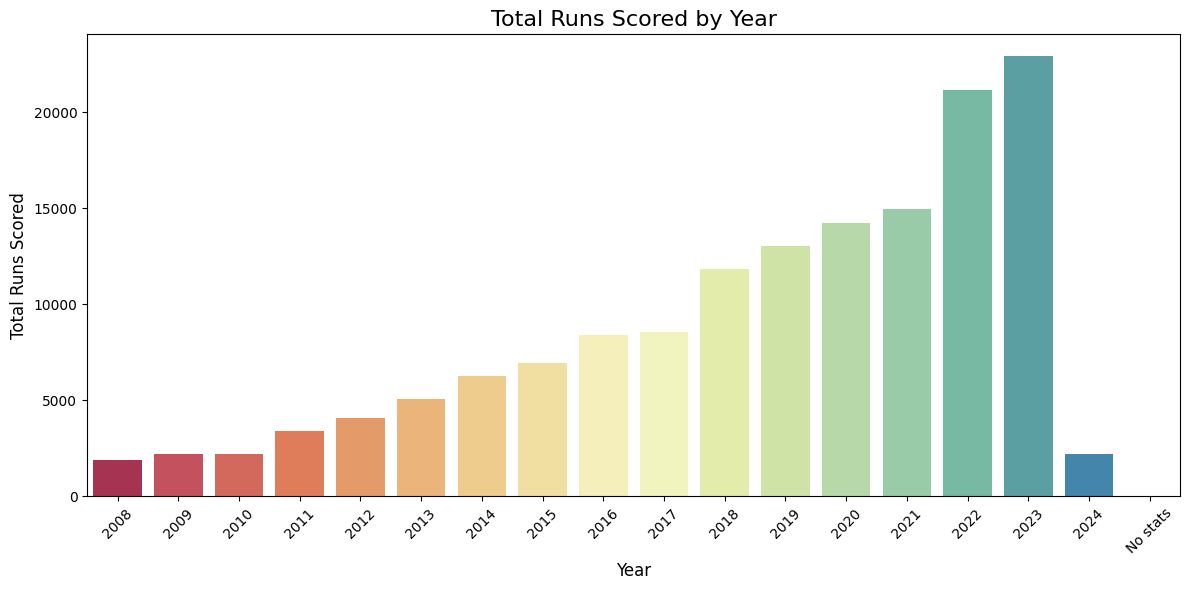

In [19]:

df['Runs_Scored'] = pd.to_numeric(df['Runs_Scored'], errors='coerce')


yearly_runs = df.groupby('Year')['Runs_Scored'].sum().sort_index()


colors = sns.color_palette("Spectral", len(yearly_runs))


plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_runs.index, y=yearly_runs.values, palette=colors)


plt.title('Total Runs Scored by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Runs Scored', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Observations:
1. The bar plot visualizes the total runs scored each year, revealing trends or anomalies over time.
2. Years with unusually high or low totals may warrant further investigation for underlying causes.

# 2.5.2 Top 10 Run Scorers

C:\Users\Abhijit\AppData\Local\Temp\ipykernel_18544\3810709321.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_runners.values, y=top_runners.index, palette='viridis')


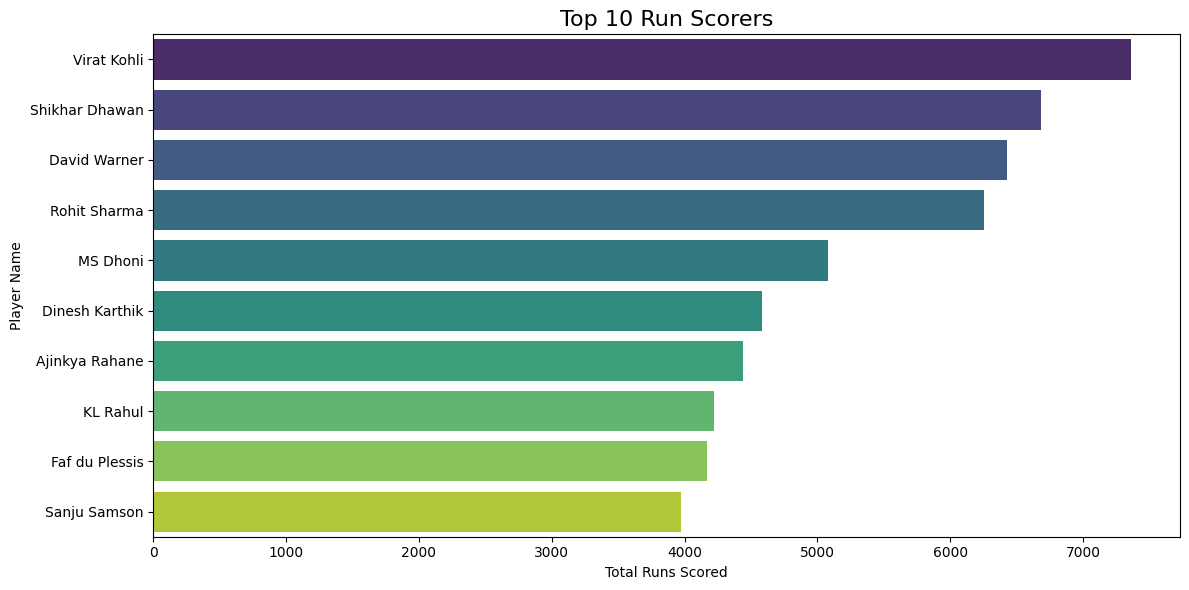

In [20]:
df['Runs_Scored'] = pd.to_numeric(df['Runs_Scored'], errors='coerce')

top_runners = df.groupby('Player_Name')['Runs_Scored'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_runners.values, y=top_runners.index, palette='viridis')

plt.title('Top 10 Run Scorers', fontsize=16)
plt.xlabel('Total Runs Scored')
plt.ylabel('Player Name')
plt.tight_layout()
plt.show()


# Observations:
1. The bar plot highlights the top 10 run scorers, making it easy to identify the most prolific batsmen in the dataset.
2. The difference in bar lengths shows the gap between players, indicating dominance or competitiveness among top performers.

# 2.5.3 Top 10 Wicket Takers

C:\Users\Abhijit\AppData\Local\Temp\ipykernel_18544\791201919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette='magma')


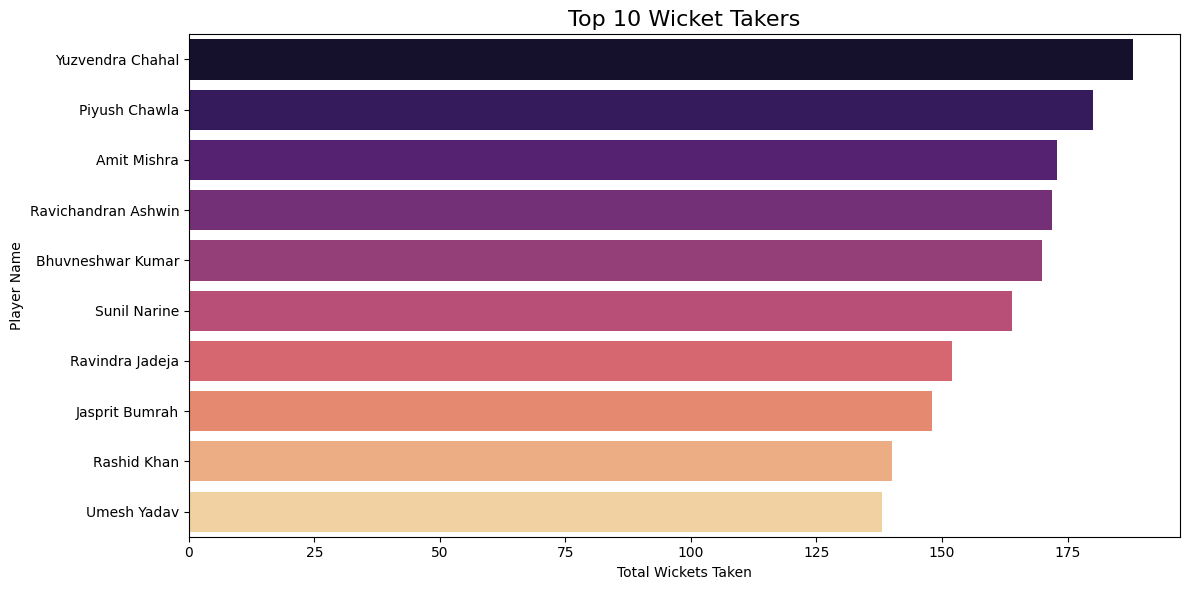

In [21]:
df['Wickets_Taken'] = pd.to_numeric(df['Wickets_Taken'], errors='coerce')

top_wicket_takers = df.groupby('Player_Name')['Wickets_Taken'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette='magma')

plt.title('Top 10 Wicket Takers', fontsize=16)
plt.xlabel('Total Wickets Taken')
plt.ylabel('Player Name')
plt.tight_layout()
plt.show()


# Observations:
1. The bar plot displays the top 10 wicket takers, highlighting the leading bowlers in the dataset.
2. The visualization helps compare the performance of bowlers and spot any significant outliers among them.

# 3- Data Cleaning & pre processing
* 1.Dropping duplicate rows
* 2.Replacing wrong entries
* 3.Handle outliers (IQR, Z-score method)
* 4.Encoding
* 5.Data splitting
* 6.Feature scaling: StandardScaler, MinMaxScaler
* 7.Feature selection:Based on correlation, domain knowledge, or model-based methods


# 3.1 Dropping duplicates

In [22]:
print(" No. of rows before dropping duplicates :", df.shape[0])
df.drop_duplicates(inplace=True)
print(" No. of rows after dropping duplicates :", df.shape[0])

 No. of rows before dropping duplicates : 1172
 No. of rows after dropping duplicates : 1172


# Observations:
1. The output shows the number of rows before and after dropping duplicates, confirming the removal of redundant data.
2. This step ensures that each record in the dataset is unique, improving data quality for analysis.

# 3.2 Replacing wrong entries

# 3.2.1 Year

In [23]:
# Before Cleaning
print("Unique categories in feature : ",df['Year'].unique())
print("Number of Unique categories in feature : ",df['Year'].nunique())
print("Count of Unique categories in feature : ",df['Year'].value_counts())

Unique categories in feature :  ['2024' '2023' '2022' '2021' '2020' '2019' '2018' '2017' '2016' '2015'
 '2014' '2013' '2012' '2011' '2010' '2009' '2008' 'No stats']
Number of Unique categories in feature :  18
Count of Unique categories in feature :  Year
2023        162
2022        141
2024        121
2021        110
2020        100
2019         92
2018         74
2017         64
2016         55
2015         47
2014         42
No stats     42
2013         33
2012         25
2011         21
2010         16
2009         15
2008         12
Name: count, dtype: int64


# Observations:
1. The output lists all unique values in the 'Year' column, helping to spot invalid entries like 'No stats'.
2. Knowing the count and distribution of unique years is important for time-based analysis and cleaning.

In [24]:
df = df[~df['Year'].astype(str).str.contains("No stats", case=False, na=False)]
df['Year'] = df['Year'].astype(int)

In [25]:
# After Cleaning
print("Unique categories in feature : ",df['Year'].unique())
print("Number of Unique categories in feature : ",df['Year'].nunique())
print("Count of Unique categories in feature : ",df['Year'].value_counts())

Unique categories in feature :  [2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011
 2010 2009 2008]
Number of Unique categories in feature :  17
Count of Unique categories in feature :  Year
2023    162
2022    141
2024    121
2021    110
2020    100
2019     92
2018     74
2017     64
2016     55
2015     47
2014     42
2013     33
2012     25
2011     21
2010     16
2009     15
2008     12
Name: count, dtype: int64


# Observations:
1. The output confirms that invalid entries have been removed and the 'Year' column is now clean and numeric.
2. The distribution of years can now be reliably used for chronological analysis and modeling.

# 3.2.2 Remove asterisk From Highest_Score

In [26]:
# Remove asterisk from 'Highest_Score' and convert to numeric
df['Highest_Score'] = df['Highest_Score'].astype(str).str.replace('*', '', regex=False)
df['Highest_Score'] = pd.to_numeric(df['Highest_Score'], errors='coerce')

In [27]:
# Preview cleaned data
print(df[['Highest_Score']].head())

   Highest_Score
0             46
1             92
2             99
3            101
4             72


# Observations:
1. The preview shows that asterisks have been removed and 'Highest_Score' is now numeric, ensuring consistency.
2. This cleaning step allows for accurate statistical analysis and visualization of the 'Highest_Score' column.

# 3.2.3 Drop rows with 'No stats' in important numeric fields

In [28]:
numeric_fields = ['Runs_Scored', 'Wickets_Taken', 'Bowling_Average']
for field in numeric_fields:
    df = df[df[field] != 'No stats']
    df = df[df[field].notna()]

In [29]:
df[numeric_fields] = df[numeric_fields].apply(pd.to_numeric, errors='coerce')

# 3.2.4 Remove 'Batting_Average' from the Dataset

In [30]:
# Drop the 'Batting_Average' column
df = df.drop(columns=['Batting_Average'], errors='ignore')

In [31]:
# Confirm by printing columns
print(df.columns)

Index(['Year', 'Player_Name', 'Matches_Batted', 'Not_Outs', 'Runs_Scored',
       'Highest_Score', 'Balls_Faced', 'Batting_Strike_Rate', 'Centuries',
       'Half_Centuries', 'Fours', 'Sixes', 'Catches_Taken', 'Stumpings',
       'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded', 'Wickets_Taken',
       'Best_Bowling_Match', 'Bowling_Average', 'Economy_Rate',
       'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls'],
      dtype='object')


# Observations:
1. The output lists all remaining columns, confirming that 'Batting_Average' has been successfully dropped.
2. Reviewing the columns helps ensure that only relevant features are retained for further analysis.

# 3.2.5 Convert relevant columns to numeric (handles any non-numeric issues)

In [32]:
# Convert relevant columns to numeric (handles any non-numeric issues)
df['Matches_Batted'] = pd.to_numeric(df['Matches_Batted'], errors='coerce')
df['Balls_Faced'] = pd.to_numeric(df['Balls_Faced'], errors='coerce')
df['Batting_Strike_Rate'] = pd.to_numeric(df['Batting_Strike_Rate'], errors='coerce')
df['Not_Outs'] = pd.to_numeric(df['Not_Outs'], errors='coerce')
df['Runs_Scored'] = pd.to_numeric(df['Runs_Scored'], errors='coerce')

In [33]:
# Drop rows with missing values in these columns
df = df.dropna(subset=['Matches_Batted', 'Balls_Faced', 'Batting_Strike_Rate', 'Not_Outs', 'Runs_Scored'])

# Observations:
1. Dropping rows with missing values in key columns ensures that the dataset is clean and ready for modeling.
2. This step may reduce the dataset size but improves the reliability of subsequent analyses.

# Save Cleaned Data

In [34]:
df.to_csv("cricket_data_cleaned.csv", index=False)
print("Cleaned data saved as 'cricket_data_cleaned.csv'")

Cleaned data saved as 'cricket_data_cleaned.csv'


# Observations:
1. The cleaned dataset is saved as 'cricket_data_cleaned.csv', making it easy to reuse for further analysis or modeling.
2. Saving the cleaned data preserves the results of preprocessing and allows for reproducibility.

# 3.3 Outliers Treatment



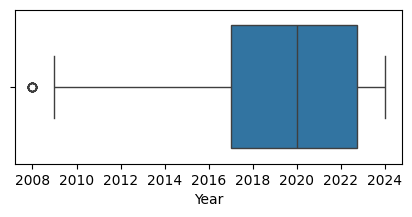

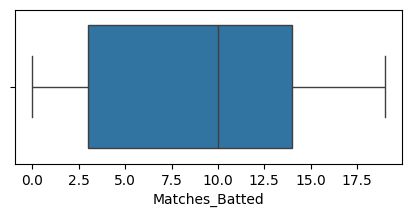

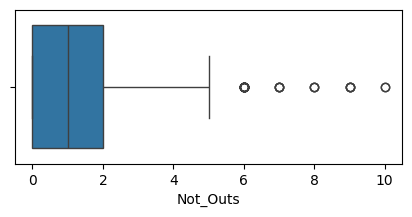

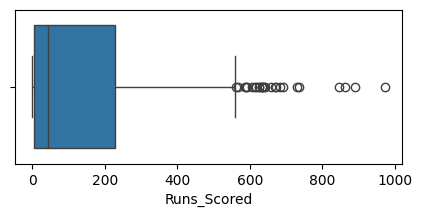

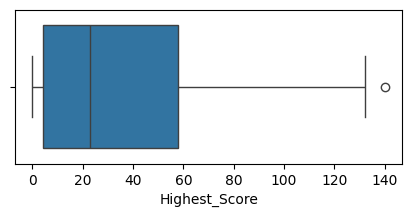

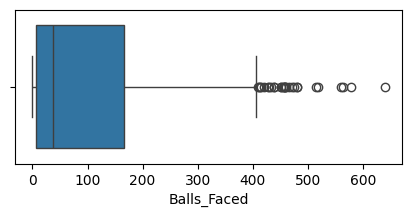

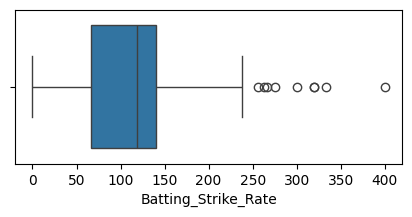

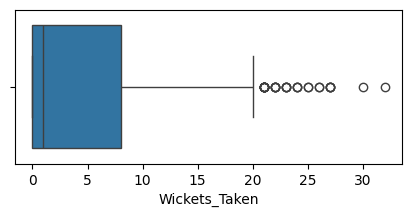

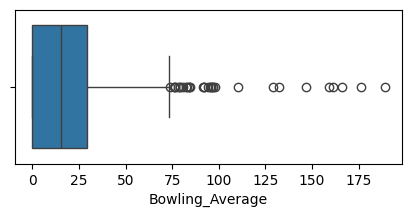

In [35]:
for i in df.select_dtypes(['int','float']).columns:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df,x=i);

# Observations:
1. The boxplots after cleaning show the effect of outlier treatment on the distribution of numerical variables.
2. Reduced number of outliers or more compact boxplots indicate successful outlier handling.

# A.IQR Method (Interquartile Range)

In [36]:
# A.IQR Method (Interquartile Range)
Q1 = df['Highest_Score'].quantile(0.25)
Q3 = df['Highest_Score'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

(np.float64(-77.0), np.float64(139.0))

# Observations:
1. The calculated lower and upper bounds using the IQR method help to define what constitutes an outlier for 'Highest_Score'.
2. These bounds are used to filter or cap outliers, improving the robustness of statistical analysis.

# Filter out outliers

In [37]:
df[(df['Highest_Score'] <= lower) | (df['Highest_Score'] >= upper)]

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
485,2022,Quinton de Kock,15,1,508.0,140,341,148.97,1,3,...,15,0,0,0.0,0,0.0,0,0,0,0


# Observations:
1. The output lists all rows where 'Highest_Score' is considered an outlier, allowing for targeted review or correction.
2. Identifying these rows is a key step before applying capping or imputation strategies.

In [38]:
df['Highest_Score'].quantile(0.99)

np.float64(113.71000000000004)

# Observations:
1. The 99th percentile value provides a threshold for extreme values, helping to decide on capping strategies.
2. This statistic is useful for understanding the upper tail of the 'Highest_Score' distribution.

In [39]:
df['Highest_Score'].describe()

count    1130.000000
mean       33.241593
std        32.438114
min         0.000000
25%         4.000000
50%        23.000000
75%        58.000000
max       140.000000
Name: Highest_Score, dtype: float64

# Observations:
1. The describe() output for 'Highest_Score' shows its central tendency and spread, helping to assess the impact of outlier treatment.
2. Comparing these statistics before and after cleaning can reveal the effectiveness of the outlier handling process.

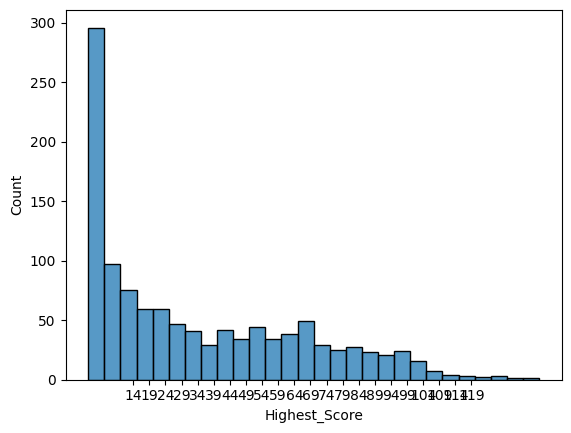

In [40]:
sns.histplot(data=df, x='Highest_Score',binwidth=5)
plt.xticks(np.arange(14,120,5));

# Observations:
1. The histogram visualizes the distribution of 'Highest_Score', showing the frequency of different score ranges.
2. Peaks or gaps in the histogram can indicate common or rare performance levels among players.

In [41]:
df['Highest_Score'] =np.where(df['Highest_Score']<= lower,df['Highest_Score'].median(),df['Highest_Score'])
df['Highest_Score'] =np.where(df['Highest_Score']>= upper,df['Highest_Score'].median(),df['Highest_Score'])

In [42]:
 df[(df['Highest_Score'] <= lower) | (df['Highest_Score'] >= upper)]

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls


# Observations:
1. The output shows if any outliers remain after capping, confirming the effectiveness of the outlier treatment.
2. Ideally, this result should be empty, indicating that all extreme values have been handled.

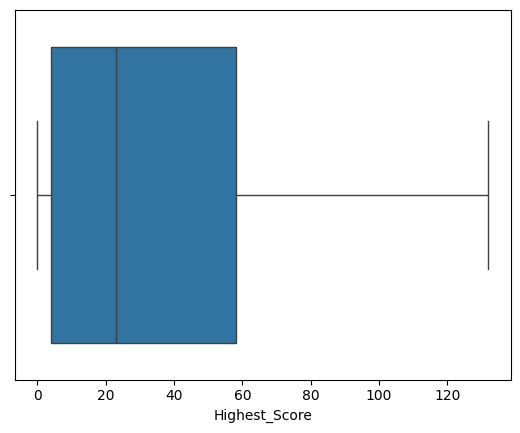

In [43]:
sns.boxplot(data=df, x='Highest_Score');

# Observations:
1. The boxplot for 'Highest_Score' after capping should show fewer or no outliers, indicating successful treatment.
2. The central box and whiskers provide a visual summary of the cleaned data's spread and central tendency.

# B. Z-Score Method

In [44]:
# B. Z-Score Method
from scipy.stats import zscore
df['zscore'] = zscore(df['Bowling_Average'])
df[df['zscore'].abs() > 3]

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,...,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,zscore
191,2020,Kuldeep Yadav,5,1,13.0,12.0,21,61.90,0,0,...,72,92,1.0,1/20,92.00,7.66,72,0,0,3.085753
212,2021,Ishant Sharma,0,0,0.0,0.0,0,0.00,0,0,...,72,97,1.0,1/26,97.00,8.08,72.00,0,0,3.295875
215,2015,Ishant Sharma,0,0,0.0,0.0,0,0.00,0,0,...,84,159,1.0,1/25,159.00,11.35,84.00,0,0,5.901392
317,2023,Kartik Tyagi,3,0,0.0,0.0,0,0.00,0,0,...,37,92,1.0,1/30,92.00,14.92,37,0,0,3.085753
327,2023,Umesh Yadav,8,3,19.0,6.0,18,105.56,0,0,...,114,189,1.0,1/27,189.00,9.95,114.00,0,0,7.162125
424,2012,Andre Russell,4,0,47.0,31.0,26,180.76,0,0,...,96,161,1.0,1/51,161.00,10.06,96.00,0,0,5.985441
514,2015,Deepak Hooda,14,0,151.0,54.0,95,158.94,0,1,...,91,129,1.0,1/35,129.00,8.50,91.00,0,0,4.640658
518,2019,Krishnappa Gowtham,7,1,18.0,9.0,19,94.73,0,0,...,120,166,1.0,1/32,166.00,8.3,120,0,0,6.195563
638,2015,Hardik Pandya,9,3,112.0,61.0,62,180.64,0,1,...,102,176,1.0,1/13,176.00,10.35,102.00,0,0,6.615807
749,2015,Rishi Dhawan,5,3,36.0,25.0,33,109.09,0,0,...,72,110,1.0,1/12,110.00,9.16,72,0,0,3.842193


# Observations:
1. The z-score calculation identifies rows where 'Bowling_Average' is more than 3 standard deviations from the mean, flagging them as outliers.
2. This method complements the IQR approach and is especially useful for normally distributed data.

In [45]:
df['Bowling_Average'].describe()

count    1130.000000
mean       18.572442
std        23.806204
min         0.000000
25%         0.000000
50%        15.340000
75%        29.382500
max       189.000000
Name: Bowling_Average, dtype: float64

# Observations:
1. The describe() output for 'Bowling_Average' provides insight into its distribution, including mean, median, and spread.
2. This summary helps assess the impact of outlier treatment and the suitability of the variable for modeling.

<Axes: xlabel='Bowling_Average', ylabel='Count'>

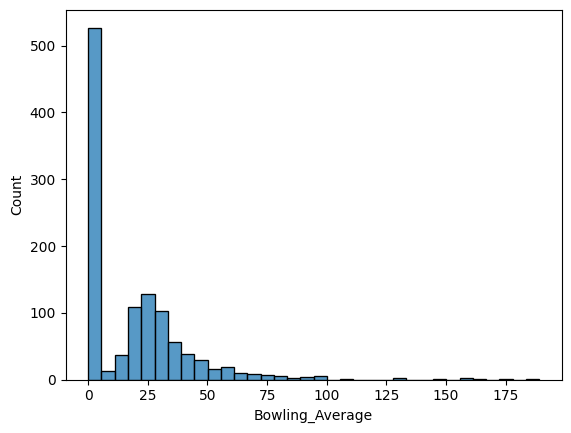

In [46]:
sns.histplot(data=df, x='Bowling_Average')
#plt.xticks(np.arange(58,680000,1000));

# Observations:
1. The histogram shows the distribution of 'Bowling_Average', highlighting common and rare values.
2. Skewness or multiple peaks in the plot may indicate the need for transformation or further cleaning.

In [47]:
df['Bowling_Average'] =np.where(df['zscore'].abs()>3,df['Bowling_Average'].median(),df['Bowling_Average'])

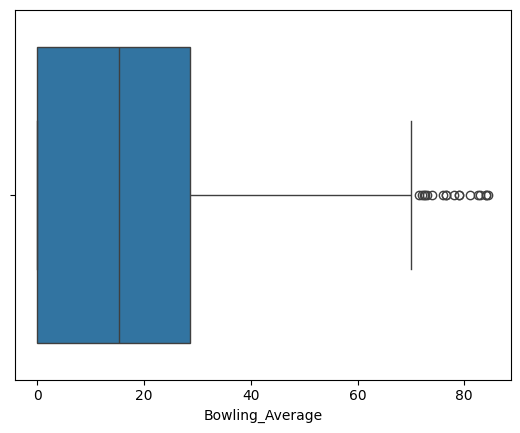

In [48]:
sns.boxplot(data=df, x='Bowling_Average');

# Observations:
1. The boxplot for 'Bowling_Average' after z-score treatment should show a reduction in outliers, indicating successful cleaning.
2. The plot provides a visual summary of the variable's spread and central tendency post-cleaning.

In [49]:
# Treating Outliers in Wickets_Taken
from scipy.stats import zscore
df['zscore'] = zscore(df['Wickets_Taken'])
df[df['zscore'].abs() > 3]

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,...,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,zscore
341,2023,Rashid Khan,17,5,130.0,79.0,60,216.67,0,1,...,402,552,27.0,4/30,20.44,8.24,14.89,1,0,3.543881
350,2023,Mohit Sharma,14,1,0.0,0.0,1,0.00,0,0,...,265,361,27.0,5/10,13.37,8.17,9.81,2,1,3.543881
452,2012,Sunil Narine,15,1,9.0,9.0,7,128.57,0,0,...,355,324,24.0,5/19,13.50,5.47,14.79,1,1,3.072217
656,2020,Jasprit Bumrah,15,1,5.0,5.0,3,166.66,0,0,...,360,404,27.0,4/14,14.96,6.73,13.33,2,0,3.543881
776,2020,Kagiso Rabada,17,4,56.0,15.0,49,114.28,0,0,...,394,548,30.0,4/24,18.26,8.34,13.13,2,0,4.015546
777,2019,Kagiso Rabada,12,1,14.0,9.0,15,93.33,0,0,...,282,368,25.0,4/21,14.72,7.82,11.28,2,0,3.229439
793,2021,Harshal Patel,15,4,59.0,31.0,46,128.26,0,0,...,338,459,32.0,5/27,14.34,8.14,10.56,1,1,4.329988
868,2021,Avesh Khan,16,1,5.0,5.0,3,166.66,0,0,...,366,450,24.0,3/13,18.75,7.37,15.25,0,0,3.072217
901,2020,Trent Boult,15,0,0.0,0.0,1,0.00,0,0,...,344,457,25.0,4/18,18.28,7.97,13.76,1,0,3.229439
909,2022,Yuzvendra Chahal,17,1,5.0,5.0,8,62.50,0,0,...,408,527,27.0,5/40,19.52,7.75,15.11,1,1,3.543881


# Observations:
1. The z-score calculation for 'Wickets_Taken' identifies extreme values, helping to flag potential outliers for this variable.
2. This step is important for ensuring that the distribution of 'Wickets_Taken' is suitable for analysis and modeling.

In [50]:
df['Wickets_Taken'].describe()

count    1130.000000
mean        4.459292
std         6.363274
min         0.000000
25%         0.000000
50%         1.000000
75%         8.000000
max        32.000000
Name: Wickets_Taken, dtype: float64

# Observations:
1. The describe() output for 'Wickets_Taken' provides key statistics, helping to assess the impact of outlier treatment.
2. This summary is useful for understanding the central tendency and spread of the variable.

<Axes: xlabel='Wickets_Taken', ylabel='Count'>

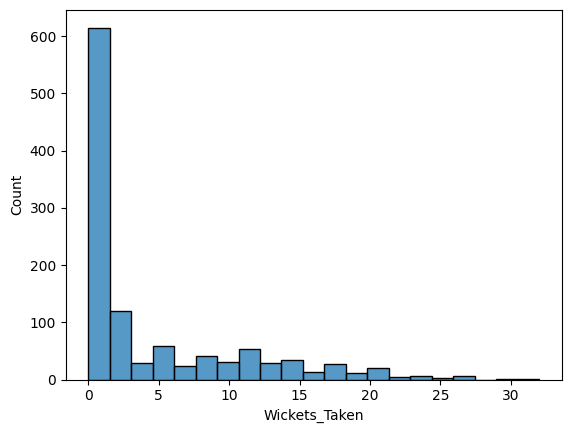

In [51]:
sns.histplot(data=df, x='Wickets_Taken')
#plt.xticks(np.arange(58,680000,1000));

# Observations:
1. The histogram for 'Wickets_Taken' shows the distribution of wickets among players, highlighting common and rare values.
2. The plot can reveal skewness or outliers that may need further attention.

In [52]:
df['Wickets_Taken'] =np.where(df['zscore'].abs()>3,df['Wickets_Taken'].median(),df['Wickets_Taken'])

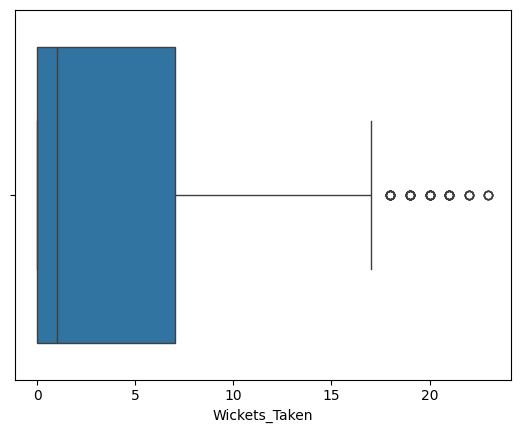

In [53]:
sns.boxplot(data=df, x='Wickets_Taken');

# Observations:
1. The boxplot for 'Wickets_Taken' after z-score treatment should show a reduction in outliers, indicating successful cleaning.
2. The plot provides a visual summary of the variable's spread and central tendency post-cleaning.

## 3.4 Encoding

Encoding is the process of converting categorical variables (text labels or categories) into a numerical format, so they can be used in machine learning models (which require numerical input).

Types of Categorical Variables
* Nominal – No natural order. E.g., Gender, Color, Country
* Ordinal – Has a meaningful order. E.g., Size (Small < Medium < Large), Rating (Low < Medium < High)

In [54]:
df.head()

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,...,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,zscore
0,2024,Ruturaj Gaikwad,2,0,61.0,46.0,51,119.61,0,0,...,0,0,0.0,0,0.0,0,0,0,0,-0.701096
1,2023,Ruturaj Gaikwad,16,1,590.0,92.0,400,147.50,0,4,...,0,0,0.0,0,0.0,0,0,0,0,-0.701096
2,2022,Ruturaj Gaikwad,14,0,368.0,99.0,291,126.46,0,3,...,0,0,0.0,0,0.0,0,0,0,0,-0.701096
3,2021,Ruturaj Gaikwad,16,2,635.0,101.0,466,136.26,1,4,...,0,0,0.0,0,0.0,0,0,0,0,-0.701096
4,2020,Ruturaj Gaikwad,6,2,204.0,72.0,169,120.71,0,3,...,0,0,0.0,0,0.0,0,0,0,0,-0.701096


In [55]:
cat_variables= df.select_dtypes('object')
num_variables= df.select_dtypes(['int','float'])

In [56]:
num_variables.columns

Index(['Year', 'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Highest_Score',
       'Balls_Faced', 'Batting_Strike_Rate', 'Wickets_Taken',
       'Bowling_Average', 'zscore'],
      dtype='object')

In [57]:
num_variables.head()

,Year,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Wickets_Taken,Bowling_Average,zscore
0,2024,2,0,61.0,46.0,51,119.61,0.0,0.0,-0.701096
1,2023,16,1,590.0,92.0,400,147.50,0.0,0.0,-0.701096
2,2022,14,0,368.0,99.0,291,126.46,0.0,0.0,-0.701096
3,2021,16,2,635.0,101.0,466,136.26,0.0,0.0,-0.701096
4,2020,6,2,204.0,72.0,169,120.71,0.0,0.0,-0.701096


In [58]:
df.head()

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,...,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,zscore
0,2024,Ruturaj Gaikwad,2,0,61.0,46.0,51,119.61,0,0,...,0,0,0.0,0,0.0,0,0,0,0,-0.701096
1,2023,Ruturaj Gaikwad,16,1,590.0,92.0,400,147.50,0,4,...,0,0,0.0,0,0.0,0,0,0,0,-0.701096
2,2022,Ruturaj Gaikwad,14,0,368.0,99.0,291,126.46,0,3,...,0,0,0.0,0,0.0,0,0,0,0,-0.701096
3,2021,Ruturaj Gaikwad,16,2,635.0,101.0,466,136.26,1,4,...,0,0,0.0,0,0.0,0,0,0,0,-0.701096
4,2020,Ruturaj Gaikwad,6,2,204.0,72.0,169,120.71,0,3,...,0,0,0.0,0,0.0,0,0,0,0,-0.701096


In [59]:
df.to_csv("df_copy.csv", index=False)
print("Cleaned data saved as 'df_copy.csv'")

Cleaned data saved as 'df_copy.csv'


# 3.5 Train Test Split (Required when building model for predictions)
#### What is train_test_split?
train_test_split is a function from scikit-learn used to split your dataset into two parts:

Training set – to train the model

Validation set – to evaluate the model's performance

#### Why is it required?
When building machine learning models, we train the model on one portion of the data and test it on unseen data to check how well it generalizes.

This prevents overfitting and gives a fair estimate of model accuracy.

In [60]:
df_TrainTestSplit= pd.read_csv('df_copy.csv')

In [61]:
df_TrainTestSplit.head()

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,...,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,zscore
0,2024,Ruturaj Gaikwad,2,0,61.0,46.0,51,119.61,0,0,...,0,0,0.0,0,0.0,0.0,0.0,0,0,-0.701096
1,2023,Ruturaj Gaikwad,16,1,590.0,92.0,400,147.50,0,4,...,0,0,0.0,0,0.0,0.0,0.0,0,0,-0.701096
2,2022,Ruturaj Gaikwad,14,0,368.0,99.0,291,126.46,0,3,...,0,0,0.0,0,0.0,0.0,0.0,0,0,-0.701096
3,2021,Ruturaj Gaikwad,16,2,635.0,101.0,466,136.26,1,4,...,0,0,0.0,0,0.0,0.0,0.0,0,0,-0.701096
4,2020,Ruturaj Gaikwad,6,2,204.0,72.0,169,120.71,0,3,...,0,0,0.0,0,0.0,0.0,0.0,0,0,-0.701096


# Separating Features and Target

In [62]:
X = df_TrainTestSplit.drop('Bowling_Average', axis=1)
y = df_TrainTestSplit['Bowling_Average']

In [63]:
X.head()

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,zscore
0,2024,Ruturaj Gaikwad,2,0,61.0,46.0,51,119.61,0,0,...,2,0,0,0.0,0,0.0,0.0,0,0,-0.701096
1,2023,Ruturaj Gaikwad,16,1,590.0,92.0,400,147.50,0,4,...,16,0,0,0.0,0,0.0,0.0,0,0,-0.701096
2,2022,Ruturaj Gaikwad,14,0,368.0,99.0,291,126.46,0,3,...,14,0,0,0.0,0,0.0,0.0,0,0,-0.701096
3,2021,Ruturaj Gaikwad,16,2,635.0,101.0,466,136.26,1,4,...,16,0,0,0.0,0,0.0,0.0,0,0,-0.701096
4,2020,Ruturaj Gaikwad,6,2,204.0,72.0,169,120.71,0,3,...,6,0,0,0.0,0,0.0,0.0,0,0,-0.701096


In [64]:
y

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
        ...  
1125    25.00
1126    57.00
1127     0.00
1128    59.00
1129    24.53
Name: Bowling_Average, Length: 1130, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
X_train, x_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)

In [66]:
X_train.head()

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,zscore
197,2019,Ishant Sharma,13,3,10.0,10.0,3,333.33,0,0,...,13,276,349,13.0,3/38,7.58,21.23,0,0,1.342782
569,2016,Rohit Sharma,14,3,489.0,85.0,368,132.88,0,5,...,14,0,0,0.0,0,0.00,0.00,0,0,-0.701096
574,2011,Rohit Sharma,16,3,372.0,87.0,297,125.25,0,3,...,16,48,53,0.0,0/14,13.25,0.00,0,0,-0.701096
784,2024,Jos Buttler,1,0,11.0,11.0,9,122.22,0,0,...,1,0,0,0.0,0,0.00,0.00,0,0,-0.701096
920,2023,Anuj Rawat,9,4,91.0,29.0,71,128.17,0,0,...,9,0,0,0.0,0,0.00,0.00,0,0,-0.701096


# 3.6 Scaling
* Why Feature Scaling is Important:

Many machine learning algorithms (like KNN, SVM, Gradient Descent-based models, Neural Networks) compute distances or rely on the magnitude of features. If one feature has a large range and another has a small range, the model might become biased toward the feature with the larger range.

In [67]:
X_train.columns

Index(['Year', 'Player_Name', 'Matches_Batted', 'Not_Outs', 'Runs_Scored',
       'Highest_Score', 'Balls_Faced', 'Batting_Strike_Rate', 'Centuries',
       'Half_Centuries', 'Fours', 'Sixes', 'Catches_Taken', 'Stumpings',
       'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded', 'Wickets_Taken',
       'Best_Bowling_Match', 'Economy_Rate', 'Bowling_Strike_Rate',
       'Four_Wicket_Hauls', 'Five_Wicket_Hauls', 'zscore'],
      dtype='object')

In [68]:
cat_cols=['Player_Name','Best_Bowling_Match']
num_cols=['Year', 'Matches_Batted', 'Not_Outs', 'Runs_Scored',
       'Highest_Score', 'Balls_Faced',
       'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
       'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled',
       'Runs_Conceded', 'Wickets_Taken', 'Economy_Rate',
       'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls', 'zscore']

In [69]:
# 1. Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()
Xtrain_scaled_MinMax = MMscaler.fit_transform(X_train[num_cols])
Xval_scaled_MinMax = MMscaler.transform(x_val[num_cols])

In [70]:
Xtrain_scaled_MinMax = pd.DataFrame(Xtrain_scaled_MinMax, columns=X_train[num_cols].columns)
Xval_scaled_MinMax = pd.DataFrame(Xval_scaled_MinMax, columns=x_val[num_cols].columns)

In [71]:
Xtrain_scaled_MinMax.head(2)

,Year,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,Fours,...,Stumpings,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,zscore
0,0.6875,0.684211,0.3,0.010277,0.075758,0.004688,0.833325,0.0,0.000,0.012048,...,0.0,0.684211,0.676471,0.618794,0.565217,0.210556,0.186228,0.0,0.0,0.40625
1,0.5000,0.736842,0.3,0.502569,0.643939,0.575000,0.332200,0.0,0.625,0.590361,...,0.0,0.736842,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000


In [72]:
X_train.head(2)

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,zscore
197,2019,Ishant Sharma,13,3,10.0,10.0,3,333.33,0,0,...,13,276,349,13.0,3/38,7.58,21.23,0,0,1.342782
569,2016,Rohit Sharma,14,3,489.0,85.0,368,132.88,0,5,...,14,0,0,0.0,0,0.00,0.00,0,0,-0.701096


In [73]:
Xtrain_scaled_MinMax.describe()

,Year,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,Fours,...,Stumpings,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,zscore
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,...,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,0.699668,0.477352,0.149336,0.133776,0.248567,0.153061,0.254954,0.011062,0.089187,0.138648,...,0.023783,0.478749,0.231178,0.225495,0.184686,0.152687,0.112778,0.026549,0.018805,0.140902
std,0.251739,0.290937,0.170205,0.172660,0.244205,0.190012,0.145384,0.068720,0.168086,0.194453,...,0.109051,0.291127,0.294546,0.278020,0.261729,0.128004,0.132974,0.104215,0.135912,0.201017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.562500,0.157895,0.000000,0.005139,0.030303,0.010547,0.166650,0.000000,0.000000,0.000000,...,0.000000,0.157895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.750000,0.526316,0.100000,0.043165,0.166667,0.058594,0.295588,0.000000,0.000000,0.036145,...,0.000000,0.526316,0.058824,0.078901,0.043478,0.202222,0.105263,0.000000,0.000000,0.031250
75%,0.875000,0.736842,0.200000,0.231501,0.439394,0.259766,0.347650,0.000000,0.125000,0.219880,...,0.000000,0.736842,0.441176,0.431294,0.304348,0.245903,0.192982,0.000000,0.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
# 2. z-score Scaling (standardization)
from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler()
Xtrain_scaled_StandardScalar = SSscaler.fit_transform(X_train[num_cols])
Xval_scaled_StandardScalar = SSscaler.transform(x_val[num_cols])

In [75]:
Xtrain_scaled_StandardScalar=pd.DataFrame(Xtrain_scaled_StandardScalar,columns=X_train[num_cols].columns)
Xval_scaled_StandardScalar=pd.DataFrame(Xval_scaled_StandardScalar,columns=x_val[num_cols].columns)

In [76]:
round(Xtrain_scaled_StandardScalar.describe(),2)

,Year,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,Fours,...,Stumpings,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,zscore
count,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,...,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.78,-1.64,-0.88,-0.78,-1.02,-0.81,-1.75,-0.16,-0.53,-0.71,...,-0.22,-1.65,-0.79,-0.81,-0.71,-1.19,-0.85,-0.25,-0.14,-0.70
25%,-0.55,-1.10,-0.88,-0.75,-0.89,-0.75,-0.61,-0.16,-0.53,-0.71,...,-0.22,-1.10,-0.79,-0.81,-0.71,-1.19,-0.85,-0.25,-0.14,-0.70
50%,0.20,0.17,-0.29,-0.53,-0.34,-0.50,0.28,-0.16,-0.53,-0.53,...,-0.22,0.16,-0.59,-0.53,-0.54,0.39,-0.06,-0.25,-0.14,-0.55
75%,0.70,0.89,0.30,0.57,0.78,0.56,0.64,-0.16,0.21,0.42,...,-0.22,0.89,0.71,0.74,0.46,0.73,0.60,-0.25,-0.14,0.54
max,1.19,1.80,5.00,5.02,3.08,4.46,5.13,14.40,5.42,4.43,...,8.96,1.79,2.61,2.79,3.12,6.62,6.68,9.35,7.22,4.28


In [77]:
X_train[num_cols].head(2)

,Year,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,Fours,...,Stumpings,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,zscore
197,2019,13,3,10.0,10.0,3,333.33,0,0,1,...,0,13,276,349,13.0,7.58,21.23,0,0,1.342782
569,2016,14,3,489.0,85.0,368,132.88,0,5,49,...,0,14,0,0,0.0,0.00,0.00,0,0,-0.701096


In [78]:
Xtrain_scaled_StandardScalar.head(2)

,Year,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,Fours,...,Stumpings,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,zscore
0,-0.048363,0.711401,0.885681,-0.715662,-0.708032,-0.781296,3.980434,-0.16106,-0.530896,-0.651413,...,-0.218212,0.706135,1.512630,1.415425,1.454718,0.452337,0.552665,-0.25489,-0.13844,1.320762
1,-0.793593,0.892405,0.885681,2.137131,1.619913,2.221819,0.531616,-0.16106,3.189493,2.324281,...,-0.218212,0.887021,-0.785299,-0.811523,-0.706031,-1.193492,-0.848591,-0.25489,-0.13844,-0.701332


In [79]:
Xtrain_scaled_StandardScalar.shape

(904, 22)

In [80]:
X_train[cat_cols].shape

(904, 2)

In [81]:
X_train[cat_cols].reset_index(drop=True)

,Player_Name,Best_Bowling_Match
0,Ishant Sharma,3/38
1,Rohit Sharma,0
2,Rohit Sharma,0/14
3,Jos Buttler,0
4,Anuj Rawat,0
...,...,...
899,Mohammed Siraj,3/27
900,Manish Pandey,0
901,Dinesh Karthik,0
902,Vijay Shankar,2/19


In [82]:
round(Xtrain_scaled_StandardScalar.describe(),2)

,Year,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,Fours,...,Stumpings,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,zscore
count,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,...,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.78,-1.64,-0.88,-0.78,-1.02,-0.81,-1.75,-0.16,-0.53,-0.71,...,-0.22,-1.65,-0.79,-0.81,-0.71,-1.19,-0.85,-0.25,-0.14,-0.70
25%,-0.55,-1.10,-0.88,-0.75,-0.89,-0.75,-0.61,-0.16,-0.53,-0.71,...,-0.22,-1.10,-0.79,-0.81,-0.71,-1.19,-0.85,-0.25,-0.14,-0.70
50%,0.20,0.17,-0.29,-0.53,-0.34,-0.50,0.28,-0.16,-0.53,-0.53,...,-0.22,0.16,-0.59,-0.53,-0.54,0.39,-0.06,-0.25,-0.14,-0.55
75%,0.70,0.89,0.30,0.57,0.78,0.56,0.64,-0.16,0.21,0.42,...,-0.22,0.89,0.71,0.74,0.46,0.73,0.60,-0.25,-0.14,0.54
max,1.19,1.80,5.00,5.02,3.08,4.46,5.13,14.40,5.42,4.43,...,8.96,1.79,2.61,2.79,3.12,6.62,6.68,9.35,7.22,4.28


In [83]:
scaled_train=pd.concat([Xtrain_scaled_StandardScalar,X_train[cat_cols].reset_index(drop=True)],axis=1)
scaled_test=pd.concat([Xval_scaled_StandardScalar,x_val[cat_cols].reset_index(drop=True)],axis=1)

In [84]:
scaled_train.to_csv('Scaled_data_train',index=False)
scaled_test.to_csv('Scaled_data_val',index=False)

# 4-Model Building (Regression), Evaluation & Tuning

### 4.1 Regression algorithms
    * Linear Regression
    * KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting
        * Adaboost,
        * Gboost,
        * XGboost
### 4.2 Model Evaluation: Regression metrics: R² & RMSE
1. R-squared (R²) — Coefficient of Determination
    * What it means:
        * Measures how well the model explains the variability in the target variable.
        * Value lies between 0 and 1 (can be negative if model performs worse than the mean).
    * Interpretation:
        * R² = 1 → perfect prediction
        * R² = 0 → model is no better than the average
        * Higher is better
          ![image.png](attachment:e23679fd-3fe1-4ef2-b9e9-1dfed173e585.png)

2. RMSE — Root Mean Squared Error
    * What it means:
        * Measures average prediction error in the same units as the target variable.
        * It gives more weight to larger errors.
    * Interpretation:
        * Lower is better
        * Easy to interpret because it’s in the same unit as
          ![image.png](attachment:65110f95-03fd-4549-be04-631970e6b345.png)
### 4.3 Model Tuning
    * GridSearchCV
    * Hyper Parameter Tuning


In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# pip install xgboost
from xgboost import XGBRegressor

In [86]:
# Features and target
X = df[['Matches_Batted', 'Balls_Faced', 'Batting_Strike_Rate', 'Not_Outs']]
y = df['Runs_Scored']

In [87]:
# Split the data into train and validation sets
x_trainFinal, x_valFinal, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Build a Linear Regression model
LR = LinearRegression()
LR.fit(x_trainFinal, y_train)
y_train_pred = LR.predict(x_trainFinal)
y_val_pred = LR.predict(x_valFinal)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train RMSE:", rmse_train, "Train R2:", r2_train)
print("Test RMSE:", rmse_val, "Test R2:", r2_val)

Train RMSE: 24.958275514373298 Train R2: 0.9790370748763013
Test RMSE: 25.33252325964707 Test R2: 0.9763931773085178


In [89]:
# Build a KNN Regressor model
knn = KNeighborsRegressor()
knn.fit(x_trainFinal, y_train)
y_train_pred = knn.predict(x_trainFinal)
y_val_pred = knn.predict(x_valFinal)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train RMSE:", rmse_train, "Train R2:", r2_train)
print("Test RMSE:", rmse_val, "Test R2:", r2_val)

Train RMSE: 10.391436229061641 Train R2: 0.9963660923397764
Test RMSE: 12.057883992296551 Test R2: 0.9946516128041238


# Building various models and comparing their performance

In [90]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

In [91]:
results = []

for name, model in models.items():
    model.fit(x_trainFinal, y_train)

    # Predictions
    y_train_pred = model.predict(x_trainFinal)
    y_val_pred = model.predict(x_valFinal)

    # Metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)

    # Store results
    results.append({
        "Model": name,
        "Train_RMSE": rmse_train,
        "Train_R²": r2_train,
        "Val_RMSE": rmse_val,
        "Val_R²": r2_val
    })

# Convert to DataFrame and sort by Validation RMSE
results_df = pd.DataFrame(results).sort_values(by='Val_RMSE')
print(results_df)

               Model  Train_RMSE  Train_R²   Val_RMSE    Val_R²
5  Gradient Boosting    3.384404  0.999615   7.556419  0.997900
6            XGBoost    0.435220  0.999994   8.531840  0.997322
3      Random Forest    3.686022  0.999543  10.394655  0.996025
1                KNN   10.391436  0.996366  12.057884  0.994652
2      Decision Tree    0.023518  1.000000  14.588758  0.992171
0  Linear Regression   24.958276  0.979037  25.332523  0.976393
4           AdaBoost   22.029421  0.983668  25.805033  0.975504


In [92]:
knn=KNeighborsRegressor()

In [93]:
knn.fit(x_trainFinal,y_train)

KNeighborsRegressor()

# Using K-Fold Cross Validation (e.g. cv=5) to make models work better

In [94]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
# Store results
results = []

for name, model in models.items():
    # Cross-validation scores (negative RMSE)
    neg_mse_scores = cross_val_score(model, x_trainFinal, y_train, scoring='neg_root_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, x_trainFinal, y_train, scoring='r2', cv=cv)

    cv_rmse_mean = -np.mean(neg_mse_scores)
    cv_r2_mean = np.mean(r2_scores)

    # Train model on full training data
    model.fit(x_trainFinal, y_train)

    # Predict on validation set
    y_val_pred = model.predict(x_valFinal)

    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_r2 = r2_score(y_val, y_val_pred)

    results.append({
        "Model": name,
        "CV_RMSE_(Train)": cv_rmse_mean,
        "CV_R²_(Train)": cv_r2_mean,
        "Val_RMSE": val_rmse,
        "Val_R²": val_r2
    })

# Display final results sorted by Validation RMSE
results_df = pd.DataFrame(results).sort_values(by='Val_RMSE')
print(results_df)

               Model  CV_RMSE_(Train)  CV_R²_(Train)   Val_RMSE    Val_R²
5  Gradient Boosting         8.902185       0.997246   7.556419  0.997900
6            XGBoost        11.449819       0.995416   8.531840  0.997322
3      Random Forest        11.814907       0.995187  10.394655  0.996025
1                KNN        14.984132       0.992236  12.057884  0.994652
2      Decision Tree        15.039184       0.992326  14.588758  0.992171
0  Linear Regression        25.152172       0.978590  25.332523  0.976393
4           AdaBoost        25.206441       0.978202  25.805033  0.975504


# Note Why we use "neg_root_mean_squared_error" in cross_val_score:
* The issue: cross_val_score() in scikit-learn is designed so that higher scores are better.
* But: RMSE (Root Mean Squared Error) is a loss function – lower is better.
* So, scikit-learn returns the negative of RMSE to keep all scorers consistent (maximize = better).

# Model tuning (Hyper parameter Tuning)

In [95]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(x_trainFinal, y_train)

# Best Random Forest model
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train predictions
y_train_pred = best_rf.predict(x_trainFinal)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Validation predictions
y_val_pred = best_rf.predict(x_valFinal)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Print results
print("\nBest Hyperparameters for Random Forest:")
print(best_params)

print("\nPerformance Metrics:")
print(f"Train RMSE : {train_rmse:.4f}")
print(f"Train R²   : {train_r2:.4f}")
print(f"Val RMSE   : {val_rmse:.4f}")
print(f"Val R²     : {val_r2:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best Hyperparameters for Random Forest:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

Performance Metrics:
Train RMSE : 3.6798
Train R²   : 0.9995
Val RMSE   : 10.3691
Val R²     : 0.9960


##### Note- We can further try changing the parameters and see if we can imporve the model performance

# 5-Model Building (Classification), Evaluation & Tuning
* Data splitting
* Classification algorithms
    * Logistic Regression
    * Naive Bayes, KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting - Adaboost, Gboost, XGboost
* Model Evaluation
    * Classification metrics:Accuracy, Precision, Recall, F1-score, Confusion matrix,ROC Curve, AUC
* Model Tuning
    * GridSearchCV

##### Importing necessary modules

In [96]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

#### For classification problem we need to scale "Half_century" as well

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset (update the path if needed)
df_encoded = pd.read_csv('cricket_data.csv')

# Create target: Predicting if a player scored any half-century
df_encoded["Highest_Score"] = df_encoded["Highest_Score"].str.replace("*", "", regex=False)
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')
df_encoded.fillna(0, inplace=True)
df_encoded["Make"] = (df_encoded["Half_Centuries"] > 0).astype(int)

# Separate features and target
X = df_encoded.drop(columns=["Player_Name", "Year", "Best_Bowling_Match", "Half_Centuries", "Make"])
y = df_encoded["Make"]

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=20)

# Define numeric and categorical columns manually based on the structure
num_cols = ['Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Highest_Score', 'Batting_Average',
            'Balls_Faced', 'Batting_Strike_Rate', 'Centuries', 'Fours', 'Sixes',
            'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled',
            'Runs_Conceded', 'Wickets_Taken', 'Bowling_Average', 'Economy_Rate',
            'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls']
cat_cols = []  # Add any dummy/encoded categorical columns if applicable

# Standardize numerical features
scaler = StandardScaler()
Xtrain_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns=num_cols)
Xval_scaled = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=num_cols)

# If you had encoded categorical columns, add them here
scaled_train = pd.concat([Xtrain_scaled, X_train[cat_cols].reset_index(drop=True)], axis=1)
scaled_val = pd.concat([Xval_scaled, X_val[cat_cols].reset_index(drop=True)], axis=1)

# Now, scaled_train and scaled_val are ready for model training and validation


In [98]:
df_encoded["Make"].value_counts()


Make
0    824
1    348
Name: count, dtype: int64

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize and train the model
gb = GradientBoostingClassifier()
gb.fit(scaled_train, y_train)

# Make predictions
pred_train = gb.predict(scaled_train)
pred_val = gb.predict(scaled_val)

# Print classification reports
print("Classification report for Train Dataset")
print(classification_report(y_train, pred_train))
print("-------------------------------------------------")
print("Classification report for Validation Dataset")
print(classification_report(y_val, pred_val))


Classification report for Train Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       668
           1       1.00      1.00      1.00       269

    accuracy                           1.00       937
   macro avg       1.00      1.00      1.00       937
weighted avg       1.00      1.00      1.00       937

-------------------------------------------------
Classification report for Validation Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00        79

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235



##### Building and comparing models using various algorithms

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(scaled_train, y_train)

    # Predictions
    y_train_pred = model.predict(scaled_train)
    y_val_pred = model.predict(scaled_val)

    # Accuracy scores
    Accuracy_train = accuracy_score(y_train, y_train_pred)
    Accuracy_test = accuracy_score(y_val, y_val_pred)

    results.append({
        "Model": name,
        "Accuracy_train": Accuracy_train,
        "Accuracy_test": Accuracy_test
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy_test", ascending=False).reset_index(drop=True)

# Show the final results
results_df


c:\Users\Abhijit\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [16:28:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy_train,Accuracy_test
0,Decision Tree,1.000000,1.000000
1,AdaBoost,1.000000,1.000000
2,Random Forest,1.000000,1.000000
3,Gradient Boosting,1.000000,1.000000
4,XGBoost,1.000000,1.000000
5,Logistic Regression,0.978655,0.974468
6,KNN,0.951974,0.936170


#### Note- We can check here that Gradient Boosting is giving us the best results, but it is overfitted. Lets try K-fold CV

#### Applying K-fold

In [101]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=57)

# Store results
results = []

# Loop through each model
for name, model in models.items():
    # Cross-validation accuracy scores
    scores = cross_val_score(model, scaled_train, y_train, cv=kf, scoring='accuracy')
    
    # Fit the model on full training set
    model.fit(scaled_train, y_train)

    # Predict on validation set
    y_val_pred = model.predict(scaled_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Store result
    results.append({
        "Model": name,
        "Mean CV Accuracy": np.mean(scores),
        "Validation Accuracy": val_accuracy
    })

# Convert to DataFrame and sort by validation accuracy
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Validation Accuracy", ascending=False).reset_index(drop=True)

# Display the results
results_df


c:\Users\Abhijit\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [16:28:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Abhijit\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [16:28:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Abhijit\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [16:28:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Abhijit\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [16:28:05] WARNING: 

,Model,Mean CV Accuracy,Validation Accuracy
0,Decision Tree,0.994675,1.000000
1,AdaBoost,0.995739,1.000000
2,Random Forest,0.996809,1.000000
3,Gradient Boosting,0.995739,1.000000
4,XGBoost,0.996809,1.000000
5,Logistic Regression,0.969064,0.974468
6,KNN,0.929605,0.936170
